In [9]:
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
import imageio  
%matplotlib inline

### __init__

In [10]:
tfd = tfp.distributions

In [11]:
prior_mean = [0, 0]
prior_cov = 1/2 * np.eye(2)

multiDist = tfd.MultivariateNormalFullCovariance(loc=prior_mean, covariance_matrix=prior_cov)

In [5]:
# multiDist.mean().numpy()
# multiDist.covariance().numpy()
# returns the probability desnity function at that point
# multiDist.prob([-1., 0]).numpy()

### linear_function

In [6]:
x = tf.constant([1.0, 2.0,4.0], dtype=tf.float32)
noise = tfd.Normal(loc=0, scale=1 / np.sqrt(25))

x.numpy()
y = (5 + x).numpy()
y

array([6., 7., 9.], dtype=float32)

In [7]:
Noise = tf.cast(noise.sample(len(x)), tf.float32).numpy()

In [8]:
y + Noise

array([5.949524, 7.029011, 9.01285 ], dtype=float32)

### get_design_matrix

In [197]:
N = 2
M = 2

matrix = np.ones((N,M)) + [[1,0],[2,4]]
matrix
# matrix[:,1]

array([[2., 1.],
       [3., 5.]])

### update_prior

## Posterior

The posterior is proportional to the product of the likelihood function and the prior:

$$p(\mathbf{\theta}|\mathcal{D})=\mathcal{N}(\mathbf{\theta}| \mu',\Sigma') \propto p(\mathcal{D}|\mathbf{\theta}) p(\mathbf{\theta})$$
and the moments are:
$$\mu' = \Sigma'(\Sigma^{-1}\mu + \beta X^T\mathbf{y})$$
$$\Sigma' = (\Sigma^{-1} + \beta XX^T)^{-1}$$

which are used in the function $\verb|update_prior|$.

In [198]:
matrix.T.dot(matrix)
np.matmul(matrix.T,matrix) 

array([[13., 17.],
       [17., 26.]])

### plot_prior

In [13]:
x = np.linspace(-1,1,5)
x

array([-1. , -0.5,  0. ,  0.5,  1. ])

In [14]:
x = np.linspace(-1, 1, 5)
y = np.linspace(-1, 1, 5)
xx,yy = np.meshgrid(x, y)
# np.meshgrid(x, y)[0][1][1]
# np.meshgrid(x, y)[1][1][1]
print('y coordinates in order:')
print(yy)
print('')
print('x coordinates in order:')
print(xx)

y coordinates in order:
[[-1.  -1.  -1.  -1.  -1. ]
 [-0.5 -0.5 -0.5 -0.5 -0.5]
 [ 0.   0.   0.   0.   0. ]
 [ 0.5  0.5  0.5  0.5  0.5]
 [ 1.   1.   1.   1.   1. ]]

x coordinates in order:
[[-1.  -0.5  0.   0.5  1. ]
 [-1.  -0.5  0.   0.5  1. ]
 [-1.  -0.5  0.   0.5  1. ]
 [-1.  -0.5  0.   0.5  1. ]
 [-1.  -0.5  0.   0.5  1. ]]


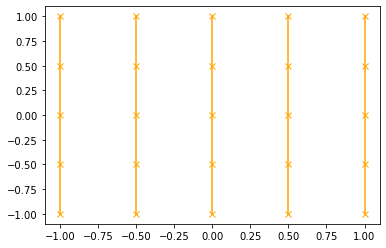

In [15]:
plt.plot(xx, yy, marker = 'x', c = 'orange')

In [16]:
# help(np.dstack)

print(np.dstack((xx,yy)).shape)
print('')
print(np.dstack((xx,yy)))

# multiDist.prob(np.dstack((xx, yy))).numpy()

(5, 5, 2)

[[[-1.  -1. ]
  [-0.5 -1. ]
  [ 0.  -1. ]
  [ 0.5 -1. ]
  [ 1.  -1. ]]

 [[-1.  -0.5]
  [-0.5 -0.5]
  [ 0.  -0.5]
  [ 0.5 -0.5]
  [ 1.  -0.5]]

 [[-1.   0. ]
  [-0.5  0. ]
  [ 0.   0. ]
  [ 0.5  0. ]
  [ 1.   0. ]]

 [[-1.   0.5]
  [-0.5  0.5]
  [ 0.   0.5]
  [ 0.5  0.5]
  [ 1.   0.5]]

 [[-1.   1. ]
  [-0.5  1. ]
  [ 0.   1. ]
  [ 0.5  1. ]
  [ 1.   1. ]]]


In [203]:
z = multiDist.prob(np.dstack((xx,yy)))
z 

<tf.Tensor: shape=(5, 5), dtype=float64, numpy=
array([[0.04307856, 0.09119731, 0.11709966, 0.09119731, 0.04307856],
       [0.09119731, 0.19306471, 0.24789999, 0.19306471, 0.09119731],
       [0.11709966, 0.24789999, 0.31830989, 0.24789999, 0.11709966],
       [0.09119731, 0.19306471, 0.24789999, 0.19306471, 0.09119731],
       [0.04307856, 0.09119731, 0.11709966, 0.09119731, 0.04307856]])>

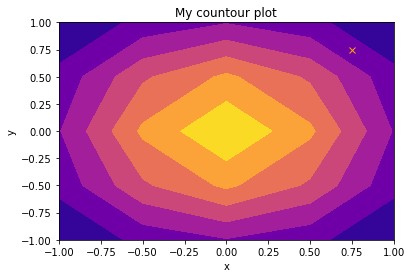

In [205]:
# ax = plt.axes(projection='3d')
p = np.ones(2)
p[0] = 0.75
p[1] = 0.75

plt.contourf(x, y, z,cmap='plasma')
plt.plot(p[0], p[1], marker = 'x', c = 'orange')
plt.title("My countour plot")
plt.xlabel("x")
plt.ylabel("y")
ax = plt.axes()
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
# plt.clf()
plt.show()

### plot_likelihood

We visualize the likelihood distribution which identifies which parameters are likely generated by the given batch of data. The log likelihood function:

$$\ln p(\mathcal{D}|\mathbf{\theta})= \frac{N}{2}\ln\beta - \frac{N}{2}\ln(2\pi) - \frac{\beta}{2}\sum^N_{n=1}\{y_n-\mathbf{\theta}^T\mathbf{x}_n\}^2$$
viewed as a function of $\mathbf{\theta}$ is
$$p(\mathcal{D}|\mathbf{\theta})\propto \exp(-\sum^N_{n=1}\{y_n-\mathbf{\theta}^T\mathbf{x}_n\}^2)$$.

In [89]:
a = tf.constant([0,0])
b = tf.constant([0,0])

x = np.linspace(-1, 1, 5)
y = np.linspace(-1, 1, 5)

theta_0, theta_1 = np.meshgrid(x, y)

least_squares_sum = 0
for point, target in zip(a, b):
    least_squares_sum += (target - (theta_0 + theta_1 * point))**2
    # print(target)
# z = np.exp(-0.2*least_squares_sum)
z = least_squares_sum
print(z)
# plt.contourf(x, y, z, cmap='plasma')
# theta_0

tf.Tensor(
[[2 0 0 0 2]
 [2 0 0 0 2]
 [2 0 0 0 2]
 [2 0 0 0 2]
 [2 0 0 0 2]], shape=(5, 5), dtype=int32)


### prediction_mean_std


We can write that the density of the new predicted value $y'$ given the previous data y as the expected value of the likelihood of the new data under the posterior density $p(\theta | y)$'

Finally, the predictive distribution is estimated from the formula:
$$p(y|X, \mathcal{D}) = \int p(y|X,\mathbf{\theta})p(\mathbf{\theta}|\mathcal{D})d\mathbf{\theta}$$
which is obtained by convolving two Gaussians:

$$p(y|X, \mathcal{D})=\mathcal{N}(y|\mu_*,\Sigma_*)$$
with
$$\mu_* = X^T\mu'$$
$$\Sigma_* = \beta^{-1} + X^T\Sigma'X$$


In [17]:
no_samples = 2
design_mtx = np.ones((2,2))
design_mtx[:,1] = [2,3]
print(design_mtx)
print('')

prediction = []
for index in range(no_samples):
    x = design_mtx[index, :]
    print(x)
    predictive_std = np.sqrt(1/2 + x.T.dot(prior_cov.dot(x)))
    predictive_mean = np.array(prior_mean).dot(x)
    prediction.append((predictive_mean, predictive_std))

prediction

[[1. 2.]
 [1. 3.]]

[1. 2.]
[1. 3.]


[(0.0, 1.7320508075688772), (0.0, 2.345207879911715)]

### plot_data_space

In [213]:
prediction_means = [x[0] for x in prediction]
print(prediction_means)
y_upper = [x[0] + 1 * x[1] for x in prediction]
print(y_upper)
y_lower = [x[0] - 1 * x[1] for x in prediction]
print(y_lower)


[0.0, 0.0]
[1.7320508075688772, 2.345207879911715]
[-1.7320508075688772, -2.345207879911715]


In [214]:
# plt.scatter(0.5,0.5,marker='o')
X = tf.constant([0.5,0.75])
T = tf.constant([0.5,-0.5])
for point, target in zip(X,T):
    print([point.numpy(),target.numpy()])

[0.5, 0.5]
[0.75, -0.5]


[1. 3.]
[1. 3.]


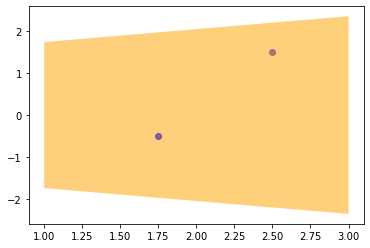

In [215]:
X = tf.constant([2.5,1.75])
T = tf.constant([1.5,-0.5])

# plt.title('Data Space (iteration {})'.format(1))
# plt.xlabel('$x$')
# plt.ylabel('$y$')
# ax = plt.axes()
# ax.set_xlim(-1, 1)
# ax.set_ylim(-1, 1)

# plot generated data points
for point, target in zip(X, T):
    plt.scatter(x=point.numpy(), y=target.numpy(), marker ='o', c='blue', alpha=0.7)

# plot confidence bounds 
    print(x)
    plt.fill_between(x, y_upper, y_lower, where=y_upper >= y_lower, facecolor='orange', alpha=0.3)

#     # plot prediction mean
#     plt.plot(x, prediction_means, '-r', label='Prediction mean', c='orange', linewidth=2.0, alpha=0.8)

#     # plot real function
#     plt.plot(x, tf.constant([1.0, 2.0], dtype=tf.float32), '-r', label='Target function', c='red', linewidth=2.0, alpha=0.8)
    
   

## Overview
Our goal is create a parametrized linear regression model under additive Gaussian noise:

$$f(x)=\theta_0 + \theta_1x$$ so that $y=f(x) + \epsilon$. The parameters $\mathbf{\theta}$ can be found by sequentially collecting samples $\mathcal{D}:=(X,\mathbf{y})=\{(x_n,y_n)\}_{n=1}^N$ from the target function and using this data in the Bayesian framework to approach the true value of parameters. However, finding the parameter distribution is merely an intermediate goal. Once we have established the distribution of coefficients through Bayesian treatment, we are able to predict y for every new input $\mathbf{x}$:

$$p(y|X, \mathcal{D}) = \int p(y|X,\mathbf{\theta})p(\mathbf{\theta}|\mathcal{D})d\mathbf{\theta}$$


The Bayesian model assigns this probability to each value of y for a given x to arrive at a probability distribution over parameters and not only point estimates. Additionally, the Bayesian approach does not suffer from over-fitting.
The prior is chosen to be a Gaussian distribution, 

$$p(\mathbf{\theta})=\mathcal{N}(\mathbf{\theta}|\mu, \Sigma)$$

with mean $\mu=\mathbf{0}$ and the variance $\Sigma=\alpha^{-1}\mathbf{I}$ is governed by a precision parameter $\alpha$ so that the prior is isotrophic. $\beta$ is the precision of the Gaussian additive noise $\epsilon$:

$$p(y|X, \mathbf{\theta}) = \mathcal{N}(y| f(X), \beta^{-1}).$$


The constructor shows the experimental setup. We define precision parameters $\alpha=2$ and $\beta=25$, as well as the coefficients $\mathbf{\theta}$ of the “unknown” linear function:

$$f(\mathbf{x}) = \theta_0+\theta_1x = -0.3 + 0.5x$$

We visualize the likelihood distribution which identifies which parameters are likely generated by the given batch of data. The log likelihood function:

$$\ln p(\mathcal{D}|\mathbf{\theta})= \frac{N}{2}\ln\beta - \frac{N}{2}\ln(2\pi) - \frac{\beta}{2}\sum^N_{n=1}\{y_n-\mathbf{\theta}^T\mathbf{x}_n\}^2$$
viewed as a function of $\mathbf{\theta}$ is
$$p(\mathcal{D}|\mathbf{\theta})\propto \exp(-\sum^N_{n=1}\{y_n-\mathbf{\theta}^T\mathbf{x}_n\}^2)$$.


## Posterior

The posterior is proportional to the product of the likelihood function and the prior:

$$p(\mathbf{\theta}|\mathcal{D})=\mathcal{N}(\mathbf{\theta}| \mu',\Sigma') \propto p(\mathcal{D}|\mathbf{\theta}) p(\mathbf{\theta})$$
and the moments are:
$$\mu' = \Sigma'(\Sigma^{-1}\mu + \beta X^T\mathbf{y})$$
$$\Sigma' = (\Sigma^{-1} + \beta XX^T)^{-1}$$

which are used in the function $\verb|update_prior|$.


## Predictive Distribution

Finally, the predictive distribution is estimated from the formula:
$$p(y|X, \mathcal{D}) = \int p(y|X,\mathbf{\theta})p(\mathbf{\theta}|\mathcal{D})d\mathbf{\theta}$$
which is obtained by convolving two Gaussians:

$$p(y|X, \mathcal{D})=\mathcal{N}(y|\mu_*,\Sigma_*)$$
with
$$\mu_* = X^T\mu'$$
$$\Sigma_* = \beta^{-1} + X^T\Sigma'X$$



In [19]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
theta_0, theta_1 = np.meshgrid(x, y)

In [23]:
np.dstack((theta_0,theta_1))

array([[[-1.        , -1.        ],
        [-0.97979798, -1.        ],
        [-0.95959596, -1.        ],
        ...,
        [ 0.95959596, -1.        ],
        [ 0.97979798, -1.        ],
        [ 1.        , -1.        ]],

       [[-1.        , -0.97979798],
        [-0.97979798, -0.97979798],
        [-0.95959596, -0.97979798],
        ...,
        [ 0.95959596, -0.97979798],
        [ 0.97979798, -0.97979798],
        [ 1.        , -0.97979798]],

       [[-1.        , -0.95959596],
        [-0.97979798, -0.95959596],
        [-0.95959596, -0.95959596],
        ...,
        [ 0.95959596, -0.95959596],
        [ 0.97979798, -0.95959596],
        [ 1.        , -0.95959596]],

       ...,

       [[-1.        ,  0.95959596],
        [-0.97979798,  0.95959596],
        [-0.95959596,  0.95959596],
        ...,
        [ 0.95959596,  0.95959596],
        [ 0.97979798,  0.95959596],
        [ 1.        ,  0.95959596]],

       [[-1.        ,  0.97979798],
        [-0.97979798,  0.97